This notebook is part of [**Byron v0.1**](https://github.com/squillero/byron)  
Copyright 2023 Giovanni Squillero and Alberto Tonda  
SPDX-License-Identifier: [Apache-2.0](https://www.tldrlegal.com/license/apache-license-2-0-apache-2-0)  

In [1]:
import byron

/var/folders/31/dkl97hks2c14b663vl55pt440000gn/T/ipykernel_40641/826285489.py:1: RuntimeWarning: 
  Paranoia checks are enabled in this notebook: performances can be significantly impaired
  [see https://github.com/squillero/byron/blob/pre-alpha/docs/paranoia.md for details]
  import byron


In [2]:
def define_golang_library():
    byron.f.set_parameter('_comment', '//')
    byron.f.set_option('$dump_node_info', False)

    main_prologue = byron.f.macro('package main\nfunc evolved_function() uint64 {{')
    main_epilogue = 'return result\n}}'

    int64 = byron.f.integer_parameter(0, 2**64)
    imath = byron.f.macro(
        'result {op}= {num}',
        op=byron.f.choice_parameter(['+', '-', '*', '/', '&', '^', '|']),
        num=int64,
    )

    var_declaration = byron.f.macro('var {_node} uint64', _label='')
    initialization = byron.f.macro(
        '{v} += uint64({n})', v=byron.f.global_reference(var_declaration, creative_zeal=1), n=int64
    )
    var_declaration.DEFAULT_PARENT = main_prologue
    code = byron.f.bunch([initialization], size=5, name='code')

    go_main = byron.f.sequence((main_prologue, code, main_epilogue))
    return go_main

In [3]:
golang = define_golang_library()

In [4]:
print(byron.dump_test_individual(golang, node_info=False))

// Automagically written by Byron v0.1.dev3 on 14-Aug-2023 at 16:40:54
package main
func evolved_function() uint64 {
var n10 uint64
var n11 uint64
var n12 uint64
var n13 uint64
n10 += uint64(8095878257575065600)
n10 += uint64(15838336090824642560)
n11 += uint64(1737265434024181760)
n12 += uint64(14040549286955597824)
n13 += uint64(2363279394319028224)
return result
}



/Users/giovanni/Repos/byron/byron/classes/individual.py:792: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(


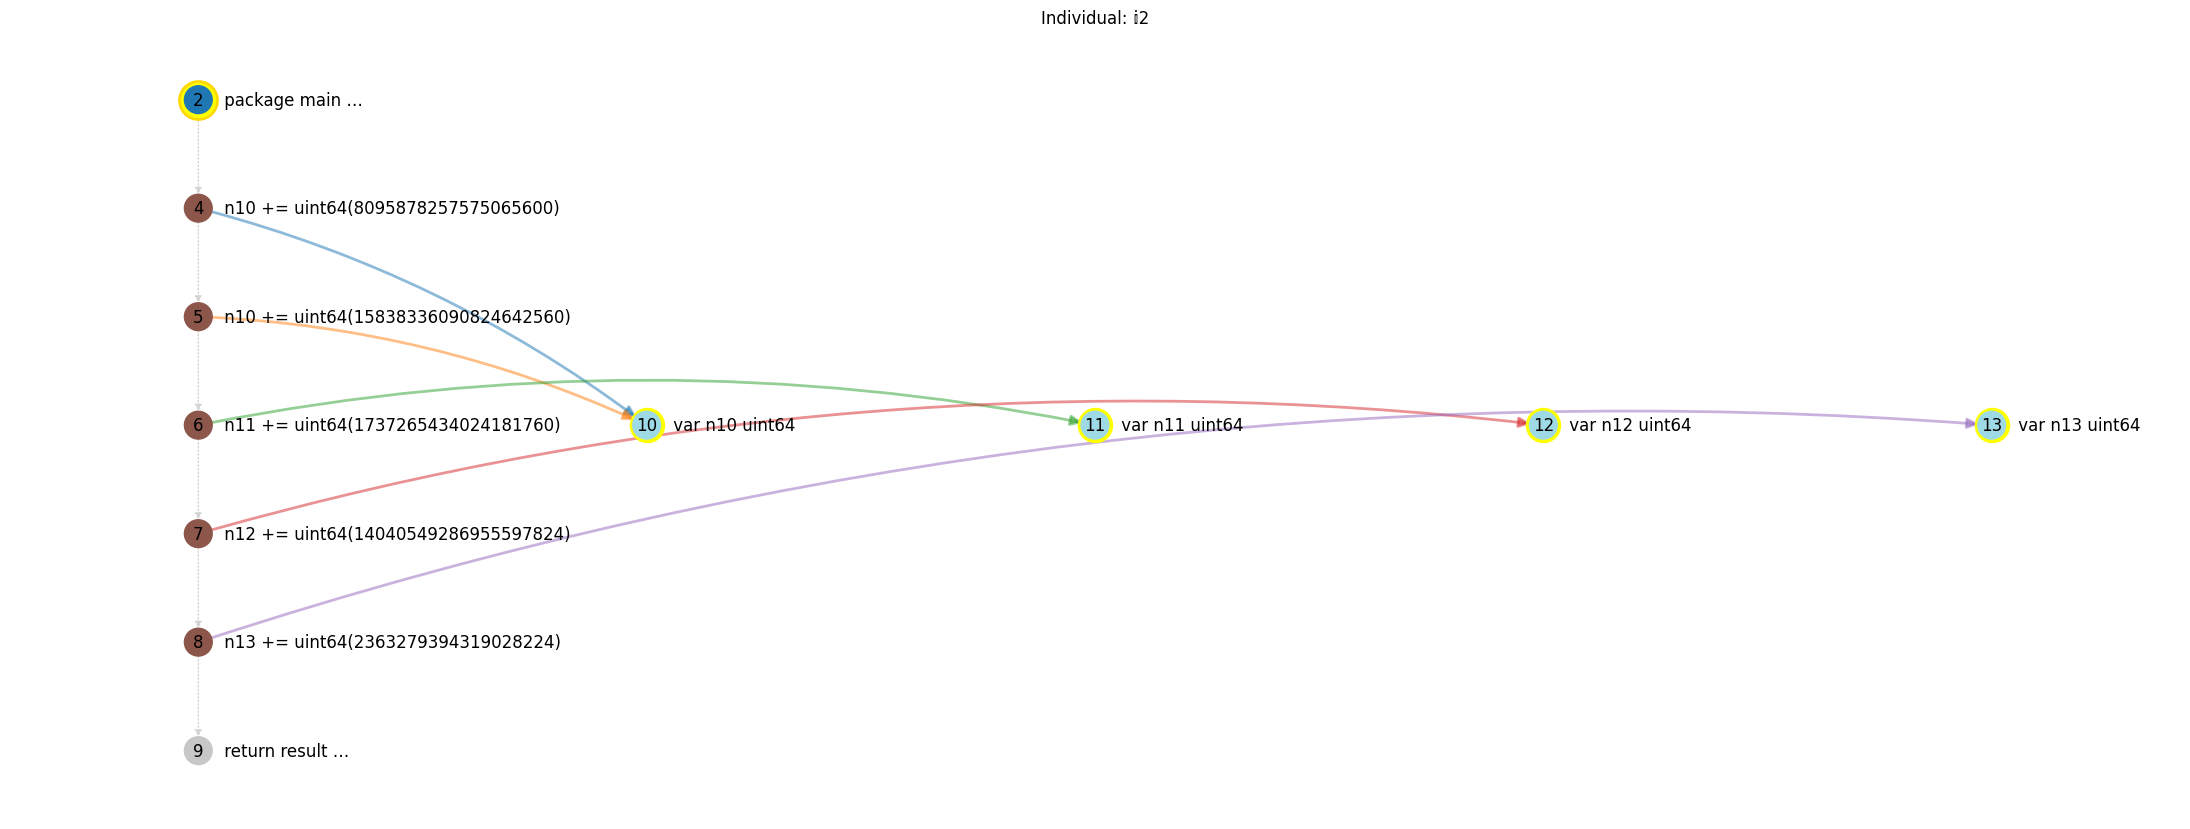

In [5]:
byron.dump_test_individual(golang, as_lgp=True)

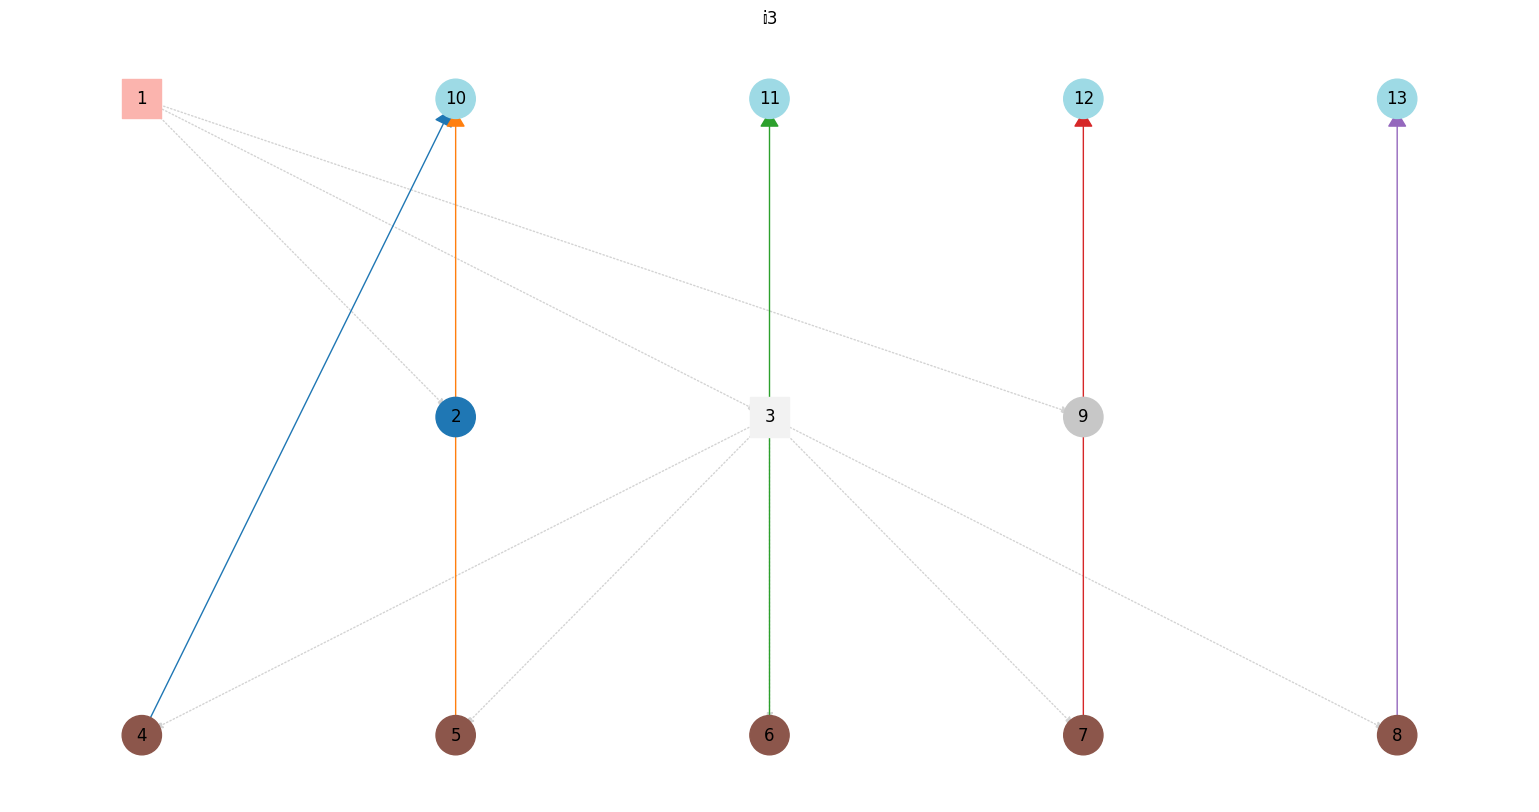

In [6]:
byron.dump_test_individual(golang, as_forest=True)